## 0.INTRODUÇÃO
Este script tem como objetivo organizar a base e dar uma primeira análise nas seguintes questões:

- Problemas de base de dados: Valores faltando, Valores duplicados, tipo de dados e consistência com a informação correspondente.
- Estrutura do dados, organizar e reestruturar em novas formas
- Análise Univariada: Analisar distribuições das variáveis, assimetrias e inconsistencias.
- Análise Multivariada: Crusar variáveis, gráficos de dispersão e boxplots, correlações e causalidades.


## 1.1.Acesso ao Drive
- Da acesso aos arquivos que estão no google drive

In [1]:
# Conectando o Notebook do Colab ao Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## 1.2.Importação dos móudlos

In [2]:
# Manipulação e tratamento dos dados
import numpy as np
import pandas as pd

# Plotagem e visualização
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## 2.Carregamento, Limpeza e Preparação dos Dados
- Verificação de informções e estruturas básicas dos dados.
- Correções e preparações.

In [3]:
# Carregamento dos dados
# Cada variável corresponde a um ano
df18 = pd.read_excel('/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Dados/Globalgap/dados_tratados/com_ufs/List_IFA_FV_2018-12-31.xlsx')
df19 = pd.read_excel('/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Dados/Globalgap/dados_tratados/com_ufs/List_IFA_FV_2019-12-31.xlsx')
df20 = pd.read_excel('/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Dados/Globalgap/dados_tratados/com_ufs/List_IFA_FV_2020-12-31.xlsx')
df21 = pd.read_excel('/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Dados/Globalgap/dados_tratados/com_ufs/List_IFA_FV_2021-12-31.xlsx')
df22 = pd.read_excel('/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Dados/Globalgap/dados_tratados/com_ufs/List_IFA_FV_2022-12-31.xlsx')
df23 = pd.read_excel('/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Dados/Globalgap/dados_tratados/com_ufs/List_IFA_FV_2023-12-31.xlsx')


In [4]:
# Lista com os DataFrames
dados = [df18, df19, df20, df21, df22, df23]

# Renomeia as colunas dos DataFrames
nome_colunas = ['ano', 'padrao', '"scheme_group"', 'escopo',  'subescopo', 'pais', 'opcao',
                'ggn', 'nome_empresa', 'uf', 'cidade', 'ggn_grupo', 'puc_ggn', 'fruta']

for dado in dados:
  dado.columns = nome_colunas


In [5]:
# Verificar as informações quanto a estrutura de dados
for check in dados:
  check.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ano             2666 non-null   int64  
 1   padrao          2666 non-null   object 
 2   "scheme_group"  2666 non-null   object 
 3   escopo          2666 non-null   object 
 4   subescopo       2666 non-null   object 
 5   pais            2666 non-null   object 
 6   opcao           2666 non-null   int64  
 7   ggn             2666 non-null   int64  
 8   nome_empresa    2666 non-null   object 
 9   uf              2662 non-null   object 
 10  cidade          2665 non-null   object 
 11  ggn_grupo       319 non-null    float64
 12  puc_ggn         2666 non-null   int64  
 13  fruta           2666 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 291.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 14 columns):
 #

---

In [6]:
# Contagem de valores nulos
for dado in dados:
  nulos = dado.isnull().sum()
  print(nulos)


ano                  0
padrao               0
"scheme_group"       0
escopo               0
subescopo            0
pais                 0
opcao                0
ggn                  0
nome_empresa         0
uf                   4
cidade               1
ggn_grupo         2347
puc_ggn              0
fruta                0
dtype: int64
ano                  0
padrao               0
"scheme_group"       0
escopo               0
subescopo            0
pais                 0
opcao                0
ggn                  0
nome_empresa         0
uf                   1
cidade               0
ggn_grupo         2483
puc_ggn              0
fruta                0
dtype: int64
ano                  0
padrao               0
"scheme_group"       0
escopo               0
subescopo            0
pais                 0
opcao                0
ggn                  0
nome_empresa         0
uf                   2
cidade               0
ggn_grupo         2392
puc_ggn              0
fruta                0
dtype: i

Três colunas com valores nulos basicamente  ...

uf

cidade

ggn_grupo**

---

In [7]:
# Remover coluna ggn_grupo (Basicamente valores NA)
# Remover outras colunas desnecessárias
for dado in dados:
  dado.drop(dado.iloc[:, [1, 2, 3, 4, 11, 12]], axis=1, inplace=True)


In [8]:
# Contagem de valores nulos agora com o novo DataFrame
yr = 2018
for dado in dados:
  var = dado.isnull().sum()
  print(yr)
  print(var)
  yr +=1


2018
ano             0
pais            0
opcao           0
ggn             0
nome_empresa    0
uf              4
cidade          1
fruta           0
dtype: int64
2019
ano             0
pais            0
opcao           0
ggn             0
nome_empresa    0
uf              1
cidade          0
fruta           0
dtype: int64
2020
ano             0
pais            0
opcao           0
ggn             0
nome_empresa    0
uf              2
cidade          0
fruta           0
dtype: int64
2021
ano             0
pais            0
opcao           0
ggn             0
nome_empresa    0
uf              1
cidade          1
fruta           0
dtype: int64
2022
ano             0
pais            0
opcao           0
ggn             0
nome_empresa    0
uf              0
cidade          0
fruta           0
dtype: int64
2023
ano             0
pais            0
opcao           0
ggn             0
nome_empresa    0
uf              2
cidade          0
fruta           0
dtype: int64


---

A seguir é feito um teste lógico para tomar decisões quanto a valores nulos!
- Se os valores ausentes de uma coluna forem menor que 5% da amostra os valores podem ser excluidos sem perdas signifcativas à amostra
- Caso contrário, mantem-se os valores ausentes na base e deve ser tomada outra decisão quanto ao que fazer com esses dados.

In [9]:
# Calculando porcentagem de valores NA - 'uf' e 'cidade': Duas colunas com valores NA
# 'yr' marca período de tempo
yr = 2018

# Calcula a 'frequência relativa' de valores nulos nas colunas específicadas
for dado in dados:
  pct_uf = (dado['uf'].isnull().sum() / len(dado['uf'])) * 100
  pct_cidade = (dado['cidade'].isnull().sum() / len(dado['cidade'])) * 100

  # Analisa se valores NA em 'uf' devem ou não ser excluídos
  if pct_uf < 5:
    decisao1 = 'EXCLUIR!'
  else:
    decisao1 = 'Manter e procurar outro método'

  # Analisa se valores NA em 'cidade' devem ou não ser excluídos
  if pct_cidade < 5:
    decisao2 = 'EXCLUIR!'
  else:
    decisao2 = 'Manter e procurar outro método'


  print(f'{yr} \nUF: {pct_uf:.2f} -> {decisao1} \nCIDADE: {pct_cidade:.2f} -> {decisao2}\n')
  yr = yr + 1


2018 
UF: 0.15 -> EXCLUIR! 
CIDADE: 0.04 -> EXCLUIR!

2019 
UF: 0.04 -> EXCLUIR! 
CIDADE: 0.00 -> EXCLUIR!

2020 
UF: 0.07 -> EXCLUIR! 
CIDADE: 0.00 -> EXCLUIR!

2021 
UF: 0.04 -> EXCLUIR! 
CIDADE: 0.04 -> EXCLUIR!

2022 
UF: 0.00 -> EXCLUIR! 
CIDADE: 0.00 -> EXCLUIR!

2023 
UF: 0.08 -> EXCLUIR! 
CIDADE: 0.00 -> EXCLUIR!



In [10]:
# Tamanho dos dados com valores NA
yr = 2018
for dado in dados:
  forma = dado.shape
  print(f'{yr} {forma}\n')
  yr = yr + 1

2018 (2666, 8)

2019 (2764, 8)

2020 (2754, 8)

2021 (2712, 8)

2022 (2577, 8)

2023 (2458, 8)



In [11]:
# Removendo os valores ausentes de todos os dados
# Exibindo o novo tamanho após remoção dos dados NA
df18 = df18.dropna()
df19 = df19.dropna()
df20 = df20.dropna()
df21 = df21.dropna()
df22 = df22.dropna()
df23 = df23.dropna()


In [12]:
# Cria nova lista
novos_dados = [df18, df19, df20, df21, df22, df23]


Aqui estamos checando a presença de duplicatas:
- Os valores duplicados são aqueles que são repetidos, a linha é igual em todas as colunas à sua linha anterior.
- Não necessáriamente será necessário remove-las.
- Checar ações a serem tomadas com o Orientador!!!

In [13]:
# Verifica valores duplicados
yr = 2018
for dado in novos_dados:
  contagem = dado.duplicated().sum()
  print(f'Valores duplicados {yr}: {contagem}')
  yr += 1

Valores duplicados 2018: 300
Valores duplicados 2019: 263
Valores duplicados 2020: 342
Valores duplicados 2021: 288
Valores duplicados 2022: 266
Valores duplicados 2023: 261


Final:
- Aqui serão agrupados novos conjuntos de dados com base em algumas características da base orignial.
- Estas serão guardadas como apoio tanto para verificações rápidas, quanto para prosseguir nas próximass etapas em questões como análises univariadas, multiraviadas e afins...

In [14]:
# Agrupando e contando os valores para cada dataframe
count_2018 = df18.groupby(['pais', 'uf', 'fruta']).size().reset_index(name='count')
count_2019 = df19.groupby(['pais', 'uf', 'fruta']).size().reset_index(name='count')
count_2020 = df20.groupby(['pais', 'uf', 'fruta']).size().reset_index(name='count')
count_2021 = df21.groupby(['pais', 'uf', 'fruta']).size().reset_index(name='count')
count_2022 = df22.groupby(['pais', 'uf', 'fruta']).size().reset_index(name='count')
count_2023 = df23.groupby(['pais', 'uf', 'fruta']).size().reset_index(name='count')

# Exibindo as contagens para cada dataframe
print("Contagem para 2018:")
print(count_2018.head(80))
print("\nContagem para 2019:")
print(count_2019.head(77))
print("\nContagem para 2020:")
print(count_2020.head(74))
print("\nContagem para 2021:")
print(count_2021.head(80))
print("\nContagem para 2022:")
print(count_2022.head(81))
print("\nContagem para 2023:")
print(count_2023.head(86))


Contagem para 2018:
         pais            uf          fruta  count
0   Argentina  buenos aires          Apple     23
1   Argentina  buenos aires  Grape (table)      3
2   Argentina  buenos aires          Lemon      2
3   Argentina  buenos aires          Mango      1
4   Argentina    entre rios          Lemon      2
..        ...           ...            ...    ...
75      Chile    taracapa I           Lime      1
76      Chile  valparaiso V          Apple      4
77      Chile  valparaiso V  Grape (table)    231
78      Chile  valparaiso V          Lemon     49
79      Chile  valparaiso V          Mango    194

[80 rows x 4 columns]

Contagem para 2019:
         pais            uf          fruta  count
0   Argentina  buenos aires          Apple     10
1   Argentina  buenos aires  Grape (table)      3
2   Argentina  buenos aires          Lemon      4
3   Argentina  buenos aires          Mango      1
4   Argentina    entre rios          Lemon      2
..        ...           ...         

In [15]:
# Agrupando apenas por frutas
frutas_2018 = df18.groupby(['pais', 'fruta']).size().reset_index(name='count')
frutas_2019 = df19.groupby(['pais', 'fruta']).size().reset_index(name='count')
frutas_2020 = df20.groupby(['pais', 'fruta']).size().reset_index(name='count')
frutas_2021 = df21.groupby(['pais', 'fruta']).size().reset_index(name='count')
frutas_2022 = df22.groupby(['pais', 'fruta']).size().reset_index(name='count')
frutas_2023 = df23.groupby(['pais', 'fruta']).size().reset_index(name='count')

# Exibindo as contagens para cada dataframe
print("Contagem para 2018:")
print(frutas_2018.head(80))
print("\nContagem para 2019:")
print(frutas_2019.head(77))
print("\nContagem para 2020:")
print(frutas_2020.head(74))
print("\nContagem para 2021:")
print(frutas_2021.head(80))
print("\nContagem para 2022:")
print(frutas_2022.head(81))
print("\nContagem para 2023:")
print(frutas_2023.head(86))


Contagem para 2018:
         pais          fruta  count
0   Argentina          Apple    320
1   Argentina  Grape (table)      9
2   Argentina          Lemon     71
3   Argentina           Lime      1
4   Argentina          Mango      1
5      Brazil          Apple     23
6      Brazil        Avocado     20
7      Brazil  Grape (table)    112
8      Brazil          Lemon     70
9      Brazil           Lime     50
10     Brazil          Mango      6
11     Brazil          Melon     24
12     Brazil         Papaya     16
13      Chile          Apple    615
14      Chile        Avocado      1
15      Chile  Grape (table)    844
16      Chile          Lemon    154
17      Chile           Lime      2
18      Chile          Mango    322
19      Chile          Melon      1

Contagem para 2019:
         pais          fruta  count
0   Argentina          Apple    293
1   Argentina  Grape (table)      7
2   Argentina          Lemon     83
3   Argentina           Lime      1
4   Argentina          

In [16]:
# Agrupando apenas por ufs
ufs_2018 = df18.groupby(['pais', 'uf']).size().reset_index(name='count')
ufs_2019 = df19.groupby(['pais', 'uf']).size().reset_index(name='count')
ufs_2020 = df20.groupby(['pais', 'uf']).size().reset_index(name='count')
ufs_2021 = df21.groupby(['pais', 'uf']).size().reset_index(name='count')
ufs_2022 = df22.groupby(['pais', 'uf']).size().reset_index(name='count')
ufs_2023 = df23.groupby(['pais', 'uf']).size().reset_index(name='count')

# Exibindo as contagens para cada dataframe
print("Contagem para 2018:")
print(ufs_2018.head(80))
print("\nContagem para 2019:")
print(ufs_2019.head(77))
print("\nContagem para 2020:")
print(ufs_2020.head(74))
print("\nContagem para 2021:")
print(ufs_2021.head(80))
print("\nContagem para 2022:")
print(ufs_2022.head(81))
print("\nContagem para 2023:")
print(ufs_2023.head(86))


Contagem para 2018:
         pais                   uf  count
0   Argentina         buenos aires     29
1   Argentina           entre rios      3
2   Argentina                jujuy      2
3   Argentina              mendoza      3
4   Argentina             misiones      2
5   Argentina              neuquen     60
6   Argentina            rio negro    237
7   Argentina                salta      5
8   Argentina             san juan      3
9   Argentina             santa fe      1
10  Argentina              tucuman     57
11     Brazil             amazonas      1
12     Brazil                bahia     51
13     Brazil                ceara     13
14     Brazil       espirito santo      7
15     Brazil         minas gerais     12
16     Brazil                 para      4
17     Brazil              paraiba      2
18     Brazil           pernambuco    127
19     Brazil  rio grande do norte     39
20     Brazil    rio grande do sul      6
21     Brazil       santa catarina     17
22     Brazil 

In [17]:
# Salva os Dados agrupados
# "Backup" de segurança

# Contagem geral ['pais', 'uf', 'fruta']
#count_2018.to_excel("count_2018.xlsx")
#count_2019.to_excel("count_2019.xlsx")
#count_2020.to_excel("count_2020.xlsx")
#count_2021.to_excel("count_2021.xlsx")
#count_2022.to_excel("count_2022.xlsx")
#count_2023.to_excel("count_2023.xlsx")

# Contagem frutas ['pais', 'frutas']
#frutas_2018.to_excel("frutas_2018.xlsx")
#frutas_2019.to_excel("frutas_2019.xlsx")
#frutas_2020.to_excel("frutas_2020.xlsx")
#frutas_2021.to_excel("frutas_2021.xlsx")
#frutas_2022.to_excel("frutas_2022.xlsx")
#frutas_2023.to_excel("frutas_2023.xlsx")

# Contagem ufs ['pais', 'uf']
#ufs_2018.to_excel("ufs_2018.xlsx")
#ufs_2019.to_excel("ufs_2019.xlsx")
#ufs_2020.to_excel("ufs_2020.xlsx")
#ufs_2021.to_excel("ufs_2021.xlsx")
#ufs_2022.to_excel("ufs_2022.xlsx")
#ufs_2023.to_excel("ufs_2023.xlsx")


## 3.Análise Univariada
- Levantamento do número de empresas certificadas por país.
- Unidades federativas (Províncias, Estados e Regiões) que mais possuem e quais as frutas que se destacam.
- Comparações iniciais entre os países.
- Maiores unidades produtoras e frutas desses países.

---

Observar a distriibuição das variáveis: Frutas e Produtores certificados por Unidade Federativa

1) Contagem de frutas por país e por ano

2018


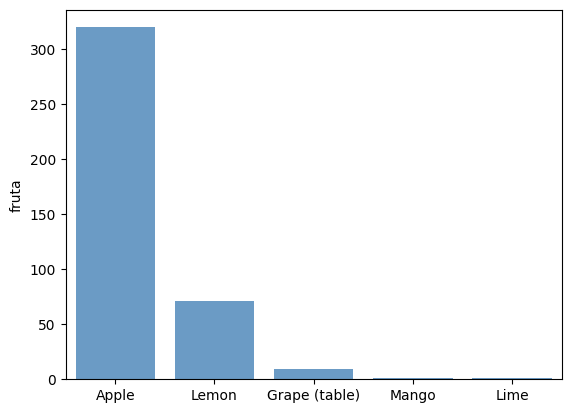

2019


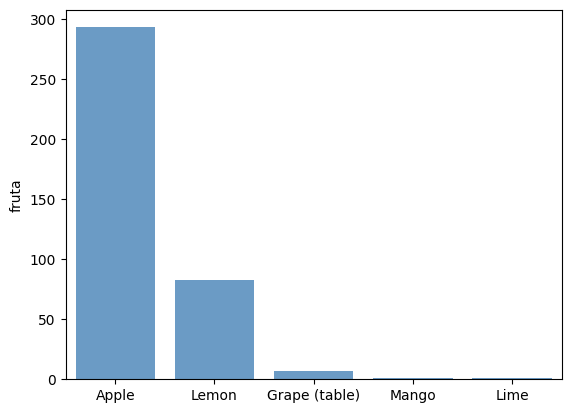

2020


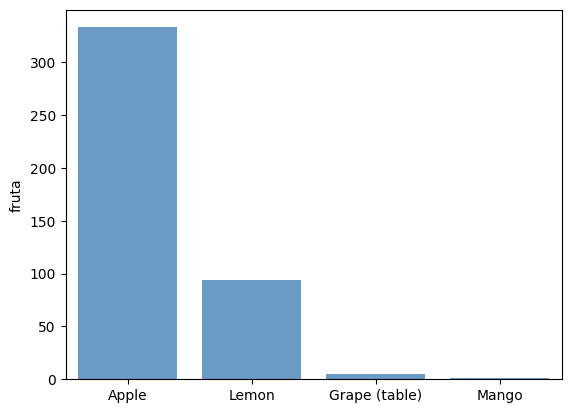

2021


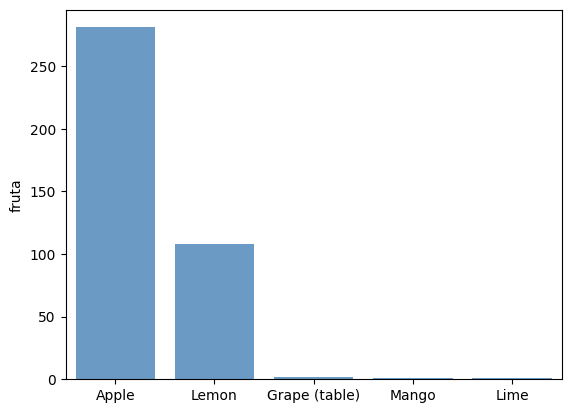

2022


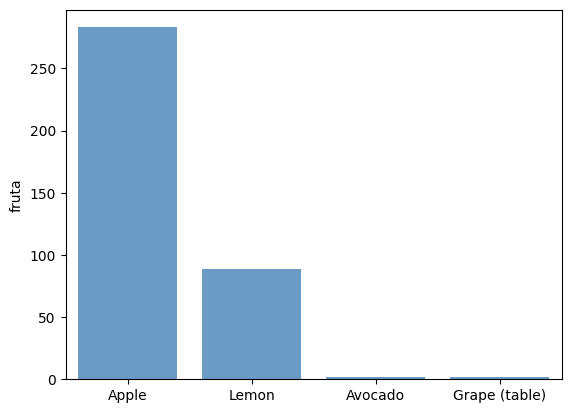

2023


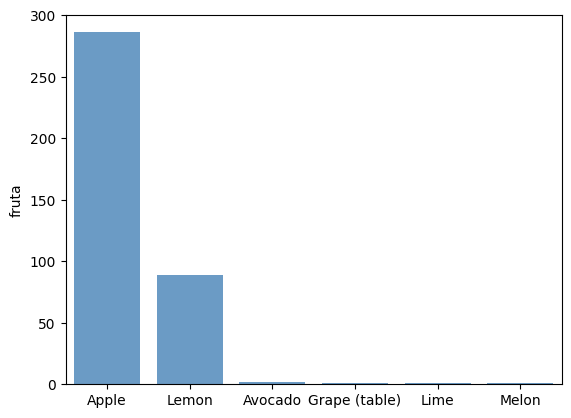

In [18]:
# Lista com os dados
nova_lista = [df18, df19, df20, df21, df22, df23]

# Contagem das frutas por ano - ARGENTINA -
yr = 2018
for dado in nova_lista:
  x = dado[dado['pais'] == 'Argentina']['fruta'].value_counts()
  plot = sns.barplot(x, color=(0.36, 0.61, 0.83))
  print(yr)
  plt.show(plot)
  yr += 1

2018


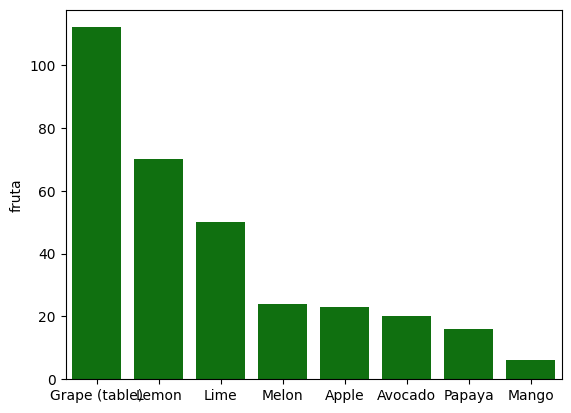

2019


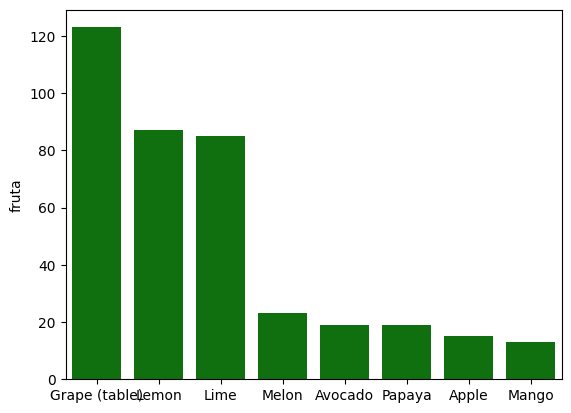

2020


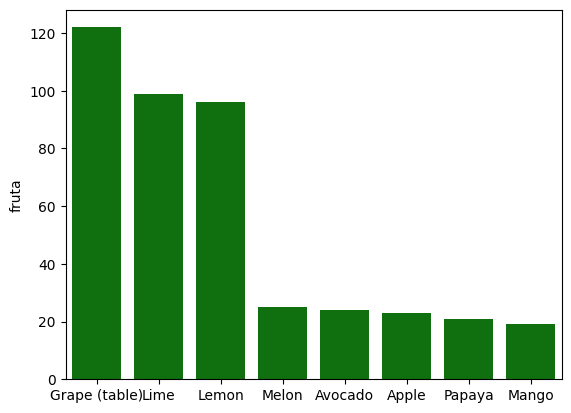

2021


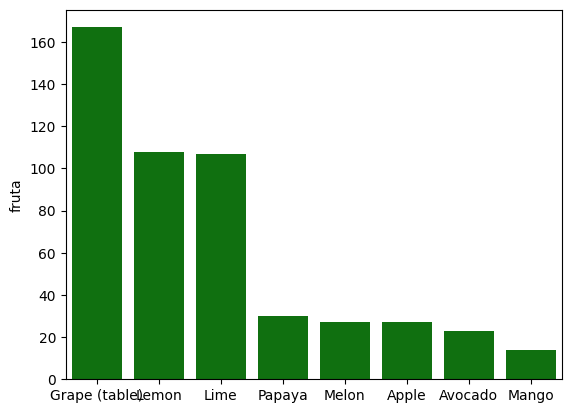

2022


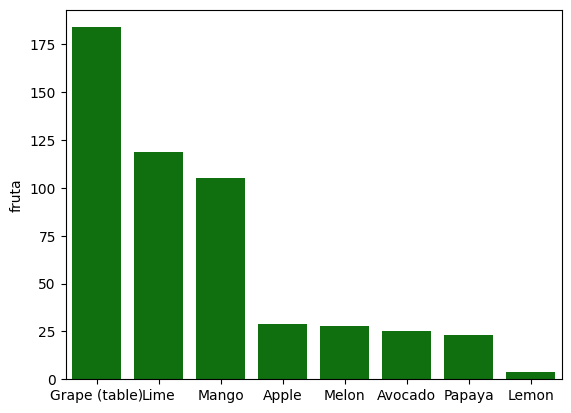

2023


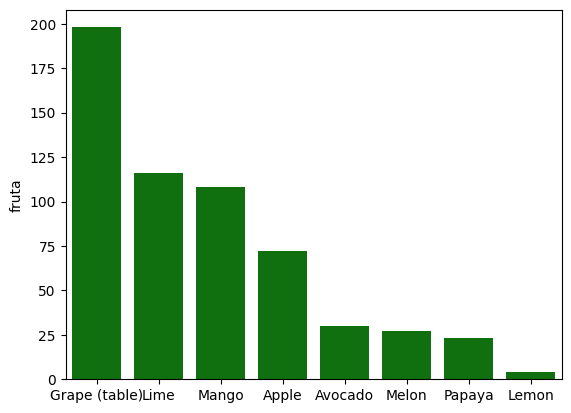

In [19]:
# Contagem das frutas por ano - BRASIL -
yr = 2018
for dado in nova_lista:
  x = dado[dado['pais'] == 'Brazil']['fruta'].value_counts()
  print(yr)
  plot = sns.barplot(x, color=(0.0, 0.5, 0.0))
  plt.show(plot)
  yr += 1


2018


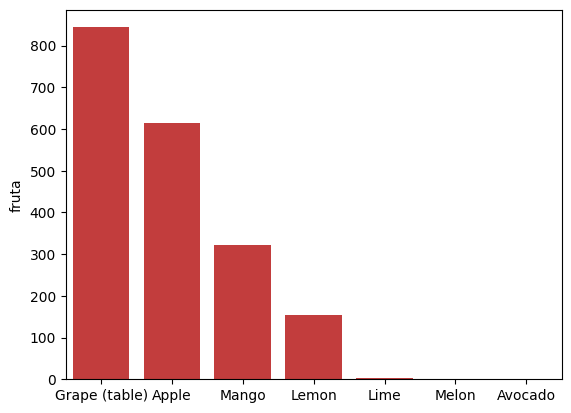

2019


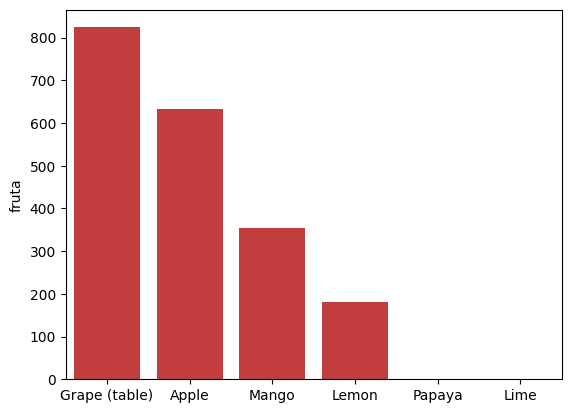

2020


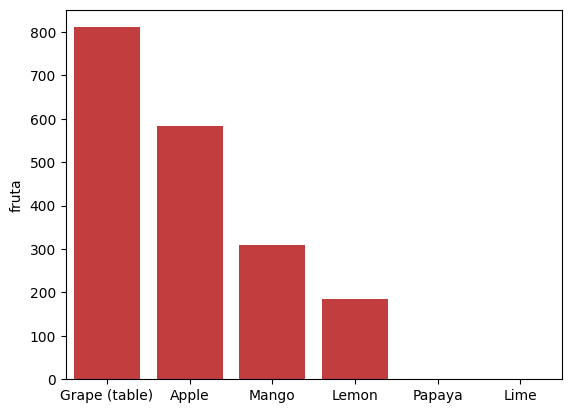

2021


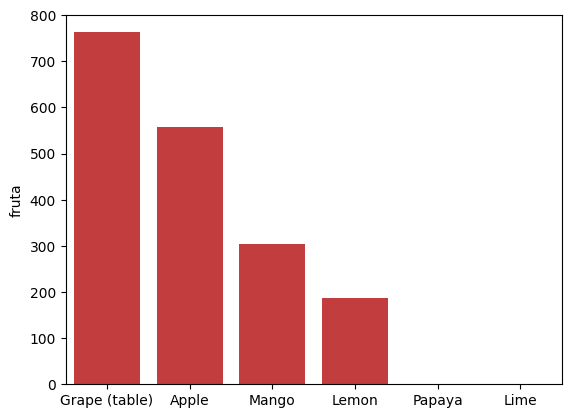

2022


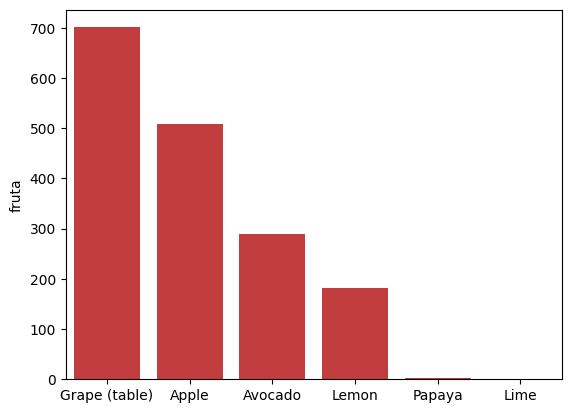

2023


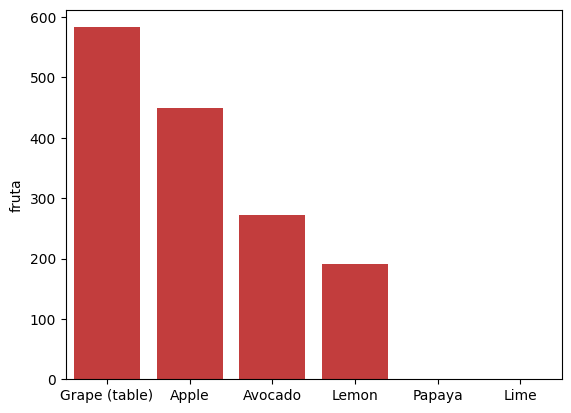

In [20]:
# Contagem das frutas por ano - CHILE -
yr = 2018
for dado in nova_lista:
  x = dado[dado['pais'] == 'Chile']['fruta'].value_counts()
  print(yr)
  plot = sns.barplot(x, color=(0.85, 0.15, 0.15))
  plt.show(plot)
  yr += 1


2) Produtores totais por país e por ano!

In [21]:
# Listas para facilitar a manipulação
anos = [2018, 2019, 2020, 2021, 2022, 2023]
argentina = []
brasil = []
chile = []

# Loops para contagem dos valores
# Valores já são armazenados nas listas de apoio
# Contagem para a Argentina
for dado in nova_lista:
  total = dado[dado['pais'] == 'Argentina'].count()
  argentina.append(total['pais'])

# Contagem para o Brasil
for dado in nova_lista:
  total = dado[dado['pais'] == 'Brazil'].count()
  brasil.append(total['pais'])

# Contagem para o Chile
for dado in nova_lista:
  total = dado[dado['pais'] == 'Chile'].count()
  chile.append(total['pais'])



In [22]:
# Cria o novo DataFrame com os valores de produtores por país em série temporal
df = pd.DataFrame(
    {
        'argentina': argentina,
        'brasil': brasil,
        'chile': chile,
    },

    index = anos

)

In [23]:
df

,argentina,brasil,chile
2018,402,321,1939
2019,385,384,1994
2020,433,429,1890
2021,393,503,1814
2022,376,517,1684
2023,380,578,1498


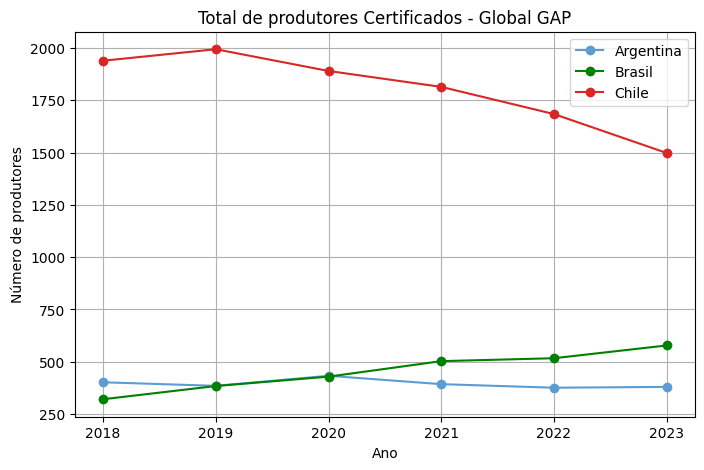

In [24]:
# Visualização dos dados
# Plota o gráfico das séries de produtores
plt.figure(figsize=(8, 5))
plt.plot(df.index, df['argentina'], label='Argentina', color=(0.36, 0.61, 0.83), marker = 'o')
plt.plot(df.index, df['brasil'], label='Brasil', color=(0.0, 0.5, 0.0), marker = 'o')
plt.plot(df.index, df['chile'], label='Chile', color=(0.85, 0.15, 0.15), marker = 'o')

# Rótulos e título
plt.xlabel('Ano')
plt.ylabel('Número de produtores')
plt.title('Total de produtores Certificados - Global GAP')
plt.legend()

# Mostra o gráfico
plt.grid(True)
plt.show()


Podemos observar que:
- Em todos os Anos o Chile apresenta valores consideravelmente superiores de produtores certificados que o Brasil e a Argentina.

- Brasil e Argentina apresentam números parecidos, com algumas flutuações para à Argentina, e uma tendência quase linear de crescimento para o Brasil.

- Chile apresenta uma tendência de decrescimento.

- O que se espera é que as exportações acompanhem a tendência das certificações

---

3) Análise das unidades federativas onde se concentram os produtores certificados

In [25]:
# Corrigindo um pequeno problema de escrita em uma linha
df19[df19['uf'] == 'tucu'] = 'tucuman'


<ipython-input-25-4b46ae5e063d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df19[df19['uf'] == 'tucu'] = 'tucuman'


In [26]:
# Separa os dados por unidades federativas de cada pais

# Cria listas de apoio para a manipulação dos dados
# A lista 'ano' já está criada ...

provincias = [] # Argentina
estados = [] # Brasil
regioes = [] # Chile

# Loops
# Contagem - Produtores por Pronvíncias - Argentina -
for dado in nova_lista:
  valores = dado[dado['pais'] == 'Argentina']['uf'].value_counts()
  provincias.append(valores)

# Contagem - Produtores por Pronvíncias - Brasil -
for dado in nova_lista:
  valores = dado[dado['pais'] == 'Brazil']['uf'].value_counts()
  estados.append(valores)

 # Contagem - Produtores por Pronvíncias - Chile -
for dado in nova_lista:
  valores = dado[dado['pais'] == 'Chile']['uf'].value_counts()
  regioes.append(valores)


In [28]:
provincias

[rio negro       237
 neuquen          60
 tucuman          57
 buenos aires     29
 salta             5
 san juan          3
 entre rios        3
 mendoza           3
 jujuy             2
 misiones          2
 santa fe          1
 Name: uf, dtype: int64,
 rio negro       236
 tucuman          66
 neuquen          46
 buenos aires     18
 jujuy             4
 entre rios        3
 mendoza           3
 santa fe          2
 salta             2
 san juan          2
 misiones          2
 Name: uf, dtype: int64,
 rio negro       265
 tucuman          74
 neuquen          61
 buenos aires     12
 misiones         10
 jujuy             3
 salta             3
 entre rios        1
 mendoza           1
 santa fe          1
 catamarca         1
 cordova           1
 Name: uf, dtype: int64,
 rio negro       209
 tucuman          88
 neuquen          64
 buenos aires     11
 misiones          7
 salta             5
 entre rios        3
 santa fe          2
 jujuy             2
 mendoza           1
 

## 4.Exportação
- Exporta os dataframes tratados para excel

In [27]:
df18.to_excel('dados_gg_2018.xlsx', index=False)
df19.to_excel('dados_gg_2019.xlsx', index=False)
df20.to_excel('dados_gg_2020.xlsx', index=False)
df21.to_excel('dados_gg_2021.xlsx', index=False)
df22.to_excel('dados_gg_2022.xlsx', index=False)
df23.to_excel('dados_gg_2023.xlsx', index=False)
